In [3]:
import numpy as np, pandas as pd
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
PATH = "/content/drive/MyDrive/Colab/"
df = pd.read_excel(PATH + "isds_data.xlsx")
titles, parties = df['Short title'].tolist(), df['Parties'].tolist()
years = [int(title[-5:-1]) for title in titles]
party_id = set()
for party in parties:
  party_id = party_id.union(set(map(str.strip, party.split(';\xa0'))))
party_id = list(party_id)
party_vec = [[p in party for p in party_id] for party in parties]

In [5]:
X, random_state = np.array(df[['Treatment', 'Expropriation', 'Procedure']]), 2
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans(random_state=random_state)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
  kmeans_model.set_params(**p)    # set current hyper parameter
  kmeans_model.fit(X)          # fit model on wine dataset, this will find clusters based on parameter p
  ss = metrics.silhouette_score(X, kmeans_model.labels_)   # calculate silhouette_score
  silhouette_scores += [ss]       # store all the scores
  print('Parameter:', p, 'Score', ss)

Parameter: {'n_clusters': 2} Score 0.3262351942632432
Parameter: {'n_clusters': 3} Score 0.3915981042792115
Parameter: {'n_clusters': 4} Score 0.2857851040271731
Parameter: {'n_clusters': 5} Score 0.24965628173985496
Parameter: {'n_clusters': 6} Score 0.2823634799507902
Parameter: {'n_clusters': 7} Score 0.28166615886759133
Parameter: {'n_clusters': 8} Score 0.2856431400858239
Parameter: {'n_clusters': 9} Score 0.24334748213160232
Parameter: {'n_clusters': 10} Score 0.2724030657718872
Parameter: {'n_clusters': 20} Score 0.25577250955628883
Parameter: {'n_clusters': 50} Score 0.2582963905068104


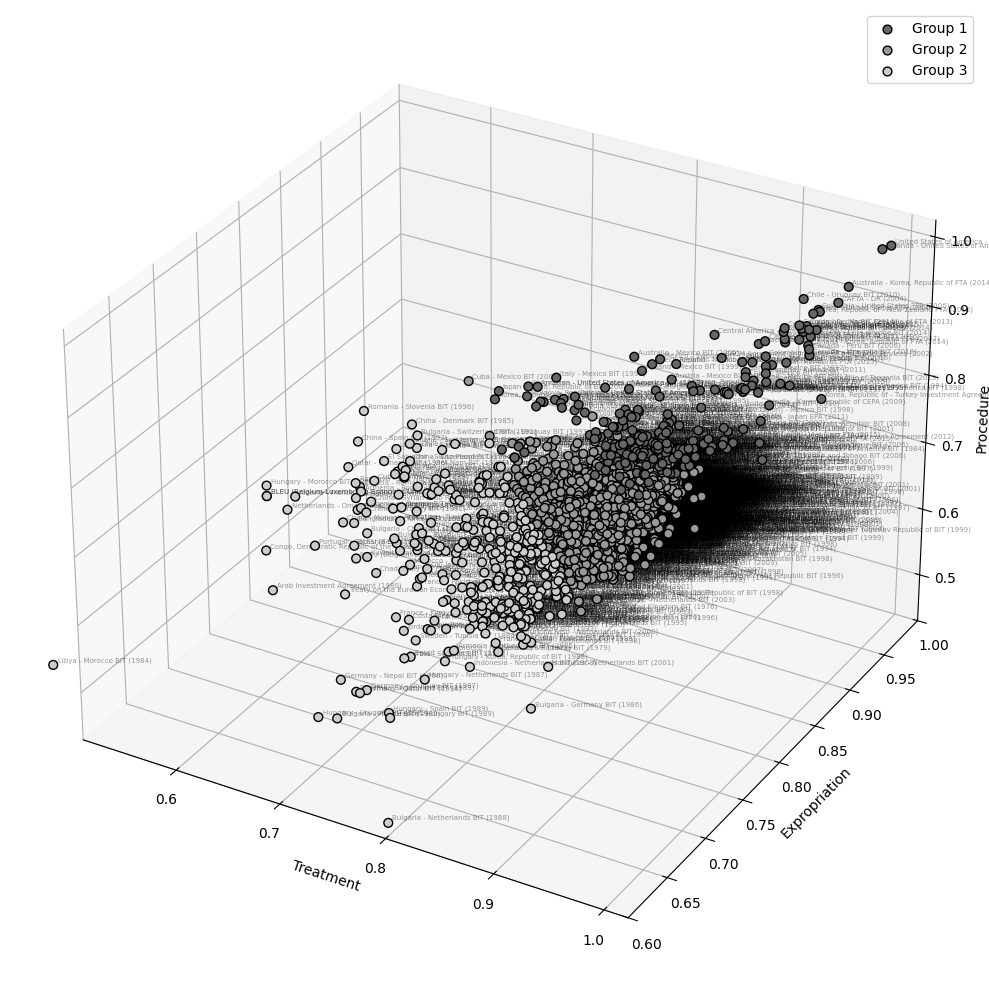

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
a, b, c = np.array(labels==0), np.array(labels==1), np.array(labels==2)
ax.scatter(X[a,0],X[a,1],X[a,2],color="#666666",s=40,label="Group 1", marker='o', alpha=1, edgecolor='black', linewidths=1)
ax.scatter(X[b,0],X[b,1],X[b,2],color="#999999",s=40,label="Group 2", marker='o', alpha=1, edgecolor='black', linewidths=1)
ax.scatter(X[c,0],X[c,1],X[c,2],color="#CCCCCC",s=40,label="Group 3", marker='o', alpha=1, edgecolor='black', linewidths=1)
for i in range(len(X)):
  ax.text(X[i][0], X[i][1]+0.005, X[i][2], titles[i], size=5, alpha=0.4, rotation = 45, zorder=-1)
plt.legend(labels=['Group 1', 'Group 2', 'Group 3'], loc="upper right")
plt.xlabel('Treatment')
plt.ylabel('Expropriation')
ax.set_zlabel('Procedure')
plt.tight_layout()
plt.ylim(0.6, 1)
plt.show()

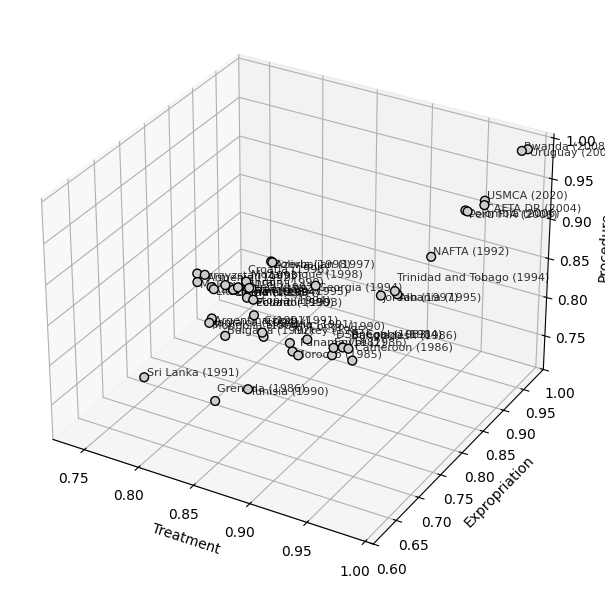

In [8]:
import random
us = pd.read_excel(PATH + "embed.xlsx", sheet_name="US")
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
a, b, c, title = us['Treatment'].tolist(), us['Expropriation'].tolist(), us['Procedure'].tolist(), us['Short title'].tolist()
ax.scatter(a, b, c, color="#CCCCCC",s=40,label="Group 3", marker='o', alpha=1, edgecolor='black', linewidths=1)
cache = list()
for i in range(len(us)):
  for j in range(len(cache)):
    if (a[i] - cache[j][0]) ** 2 + (b[i] - cache[j][1]) ** 2 + (c[i] - cache[j][2]) ** 2 < 0.03:
      if 0 < cache[j][2] - c[i] < 0.02:
        c[i] = c[i] - 0.01
        break
      elif -0.02 < cache[j][2] - c[i] < 0:
        c[i] = c[i] + 0.01
        break
  ax.text(a[i], b[i]+ 0.005, c[i], title[i], size=8, alpha=0.8, zorder=-1)
  cache.append([a[i], b[i], c[i]])
plt.xlabel('Treatment')
plt.ylabel('Expropriation')
ax.set_zlabel('Procedure')
plt.tight_layout()
plt.ylim(0.6, 1)
plt.show()